<a href="https://colab.research.google.com/github/PPatrickGU/Projet-Adagos/blob/main/Projet_d'Adagos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet d'Adagos**
### ***Author: Zheyi SHEN, Zhaoyi GUAN, Dajing GU & Anastasiya DULEPOVA*** 

In [286]:
import cv2
import numpy as np
import random
from google.colab import drive
from google.colab.patches import cv2_imshow

In [287]:
# mount my google drive 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


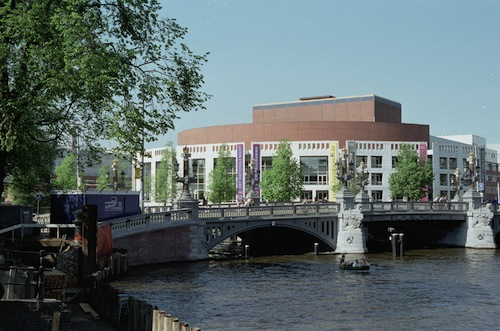

In [288]:
# read the image
path_img = '/drive/My Drive/PIC-PROJ/image/Amst.jpg'
img = cv2.imread(path_img)
cv2_imshow(img)

## **Imgae procession**

In [289]:
def random_type(img, ratio):
  (h,w,d) = img.shape
  new_img = img.copy()
  num = int(h * w * ratio)
  index_y = np.random.randint(h,size=num)
  index_x = np.random.randint(w,size=num)
  for i in range(num):
    new_img[index_y[i],index_x[i],:] = 0
  return new_img


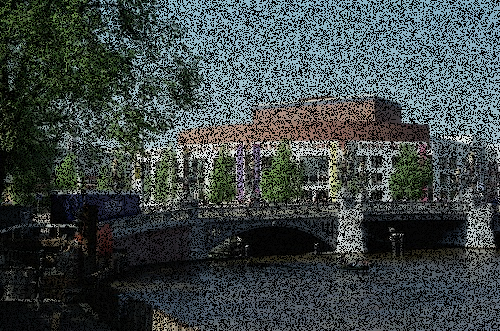

In [290]:
new_img = random_type(img,0.4)
cv2_imshow(new_img)

In [291]:
def grid_type(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  for i in range(0,h,2):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
  return new_img

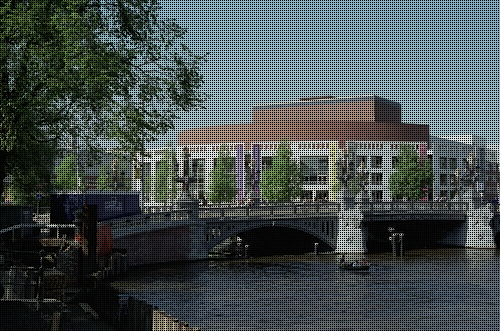

In [292]:
cv2_imshow(grid_type(img))

In [293]:
def rectangle_type(img, hr, wr):
  (h,w,d) = img.shape
  new_img = img.copy()
  y = np.random.randint(h)
  x = np.random.randint(w)
  for i in range(y,min(y+hr,h)):
    for j in range(x,min(x+wr,w)):
      new_img[i,j,:] = 0
  return new_img   
  

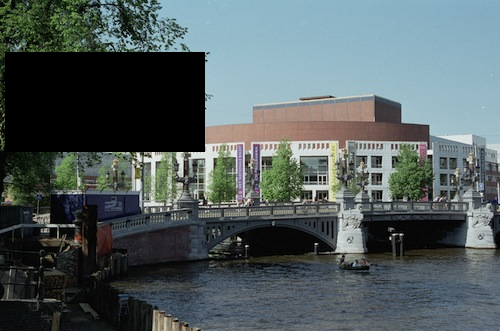

In [294]:
cv2_imshow(rectangle_type(img,100,200))  

In [295]:
def masque_rec(img):
    '''
    create a rectangle masque of random size
    '''
    h,w,c = img.shape
    new_img = img.copy()
    hm1, hm2 = random.randint(1,h), random.randint(1,h)
    hm_1, hm_2 = min(hm1,hm2), max(hm1, hm2)
    wm1, wm2 = random.randint(1, w), random.randint(1, w)
    wm_1, wm_2 = min(wm1,wm2), max(wm1, wm2)

    cv2.rectangle(new_img, (hm_1, wm_1), (hm_2, wm_2), (0, 0, 0), -1)
    return new_img

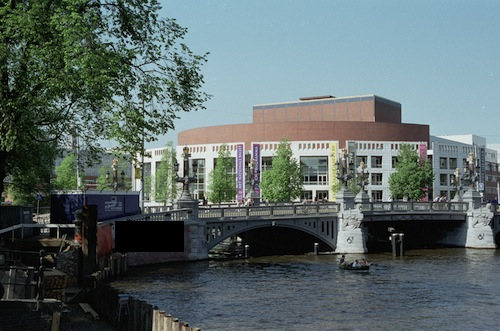

In [296]:
cv2_imshow(masque_rec(img)) 

In [297]:
def masque_grille(img):
    '''
    create a grille masque of random size
    '''
    h,w,c = img.shape
    new_img = img.copy()
    GRID_SIZE = random.randint(1,min(h,w))
    THICKNESS = random.randint(1,GRID_SIZE//3)
    for x in range(0, w - 1, GRID_SIZE):
        cv2.line(new_img, (x, 0), (x, h), (0, 0, 0), THICKNESS)
    for y in range(0, h - 1, GRID_SIZE):
        cv2.line(new_img, (0, y), (w, y), (0, 0, 0), THICKNESS)
    return(new_img)

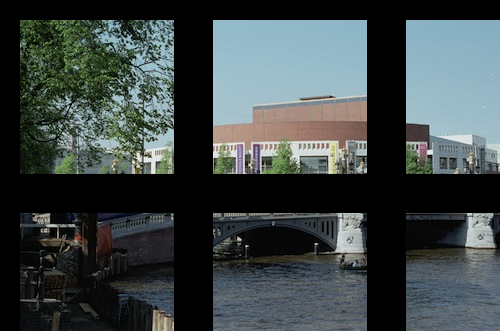

In [298]:
cv2_imshow(masque_grille(img))

In [299]:
def vertical_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  for i in range(0,h):
    for j in range(0,w,2):
      new_img[i,j,:] = 0
  cv2_imshow(new_img) 

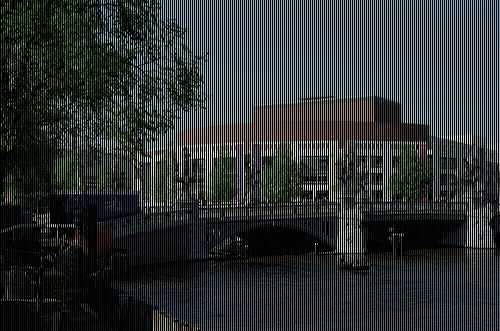

In [300]:
vertical_stripes(img)

In [301]:
def horizontal_stripes(img):
  (h,w,d) = img.shape
  new_img = img.copy()
  for i in range(0,h,2):
    for j in range(0,w):
      new_img[i,j,:] = 0
  cv2_imshow(new_img) 

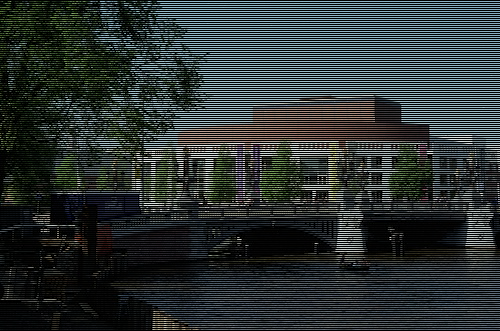

In [302]:
horizontal_stripes(img)

## **Data generation**

In [303]:
def rectangle_type(img, hr, wr):
  (h,w) = img.shape
  new_img = img.copy()
  y = np.random.randint(h)
  x = np.random.randint(w)
  for i in range(y,min(y+hr,h)):
    for j in range(x,min(x+wr,w)):
      new_img[i,j] = 0
  return new_img   

In [304]:
def Data_train(img, rate):
  ''' 
  Create dataset for model training
  '''
  new_img = img.copy()
  a =  np.where(new_img!=0)
  n = len(a[0]) 
  X, Y = np.zeros(shape=(n,2)), np.zeros(shape=(n,1))
  for i in range(n):
    x, y = a[0][i], a[1][i]
    # r, g, b = new_img[x,y,0], new_img[x,y,1], new_img[x,y,2]
    gris = new_img[x,y]
    X[i,:] = [x,y]
    # Y[i,:] = [r,g,b]
    Y[i] = gris
  n = int(rate*n)
  X_train, X_validate = X[:n,:], X[n:-1,:]
  Y_train, Y_validate = Y[:n,:], Y[n:-1,:]
  return X_train, Y_train, X_validate, Y_validate

In [305]:
def Data_test(img):
  ''' 
  Create dataset for model test
  '''
  new_img = img.copy()
  a =  np.where(new_img==0)
  n = len(a[0]) 
  X_test, Y_test = np.zeros(shape=(n,2)), np.zeros(shape=(n,3))
  for i in range(n):
    x, y = a[0][i], a[1][i]
    # r, g, b = new_img[x,y,0], new_img[x,y,1], new_img[x,y,2]
    gris = new_img[x,y]
    X_test[i,:] = [x,y]
    Y_test[i] = gris
  return X_test, Y_test

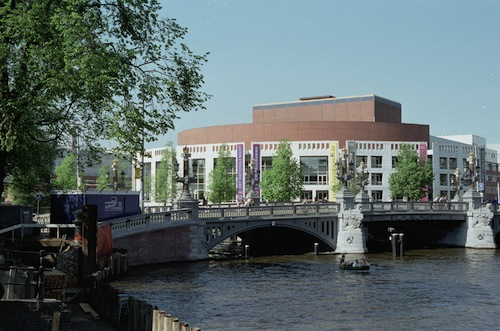

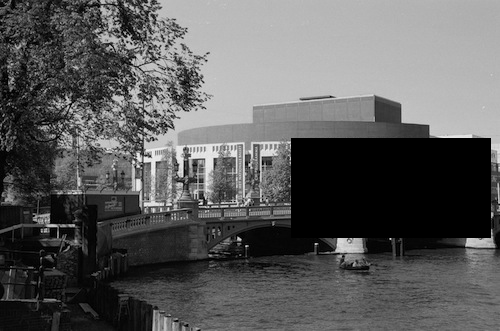

In [306]:
cv2_imshow(img)
new_img = rectangle_type(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), 100, 200) #shape [*,*,3]
cv2_imshow(new_img)
new_img = new_img/255 # nomalization

X_train, Y_train, X_validate, Y_validate = Data_train(new_img, 0.2)
X_test, Y_test = Data_test(new_img)


In [307]:
print(X_validate.shape)
print(Y_validate.shape)
# for inputs, labels in X_train:
#   print('inputs',inputs)
#   # print('labels',labels)

(116258, 2)
(116258, 1)


## **Model creation using Keras**

In [308]:
import tensorflow as tf
from tensorflow.keras import *
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [309]:
backend.clear_session()

In [310]:
class Network(tf.keras.Model):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = layers.Dense(units=1, activation='relu')
    def call(self, inputs, training=None, mask=None):
        x = self.fc1(inputs)
        return x

In [311]:
model = Network() 
model.build(input_shape=(None, 2)) # num_batch, input_size
model.summary() # print the network


Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## **Model training demo (using Keras)**

In [312]:
model.compile(optimizer='adam',loss='MAE',metrics=None)
print('Begin training:')
history = model.fit(X_train, Y_train, epochs=10)
print('Training finished:')


Begin training:
Epoch 1/10
909/909 [==============================] - 2s 2ms/step - loss: 19.1864
Epoch 2/10
909/909 [==============================] - 1s 1ms/step - loss: 0.6768
Epoch 3/10
909/909 [==============================] - 1s 2ms/step - loss: 0.5789
Epoch 4/10
909/909 [==============================] - 1s 1ms/step - loss: 0.5766
Epoch 5/10
909/909 [==============================] - 1s 2ms/step - loss: 0.5739
Epoch 6/10
909/909 [==============================] - 1s 1ms/step - loss: 0.5756
Epoch 7/10
909/909 [==============================] - 1s 2ms/step - loss: 0.5754
Epoch 8/10
909/909 [==============================] - 1s 1ms/step - loss: 0.5744
Epoch 9/10
909/909 [==============================] - 1s 2ms/step - loss: 0.5740
Epoch 10/10
909/909 [==============================] - 1s 2ms/step - loss: 0.5762
Training finished:


In [313]:
print('Begin testing:')
model.predict(X_test)

Begin testing:


array([[0.        ],
       [1.035367  ],
       [0.        ],
       ...,
       [0.83386445],
       [0.        ],
       [0.        ]], dtype=float32)

## **Model training (without using Keras)**

In [314]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
test_loss = tf.keras.metrics.Mean(name='test_loss')

In [315]:
def train_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  train_loss(loss)

In [316]:
def test_step(model, inputs, labels): #inputs：X_train; labels：Y_train
  predictions = model(inputs)
  t_loss = loss_object(labels, predictions)
  test_loss(t_loss)

In [ ]:
EPOCHS = 5

for epoch in range(EPOCHS):
  train_loss.reset_states()
  test_loss.reset_states()
# len(X_train)
  for i in range(1,len(X_train)):
    train_step(model, X_train[i,:].reshape(1,2), Y_train[i])
    
  for i in range(1,len(X_validate)):
    test_step(model, X_validate, Y_validate)

  template = 'Epoch {}, Loss: {}, Test Loss: {}'
  print(template.format(epoch+1,train_loss.result(),test_loss.result()))